# Project: Wrangling and Analyze Data

In [6]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [7]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [8]:
page = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', 'wb') as f:
    test = f.write(page.content)
image_pred = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
tweets = []
i = 1
for line in open('tweet-json.txt'):
    tweets.append(json.loads(line))
    i += 1
    
rt_fav = pd.DataFrame(tweets)
rt_fav = rt_fav[["id", 'retweet_count', 'favorite_count']]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
#Visually view the dataframe
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
#Visually View the dataframe
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
#Visually View the dataframe
rt_fav

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
rt_fav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [16]:
columns = pd.Series(list(twitter_archive) + list(image_pred) + list(rt_fav))
columns[columns.duplicated()]

17    tweet_id
dtype: object

In [17]:
#Retweets
twitter_archive[twitter_archive.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [18]:
#View Value counts for rating denominators
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [19]:
#View Value counts for dogs names
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Blu          1
Pip          1
Jerome       1
Rudy         1
Blakely      1
Name: name, Length: 957, dtype: int64

In [20]:
#View p1 column of image dataframe as series
image_pred.p1

0       Welsh_springer_spaniel
1                      redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 Chihuahua
2073                 Chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object

In [21]:
#View p2 column of image dataframe as series
image_pred.p2

0                   collie
1       miniature_pinscher
2                 malinois
3                  redbone
4               Rottweiler
               ...        
2070      English_springer
2071    Labrador_retriever
2072              malamute
2073              Pekinese
2074                 bagel
Name: p2, Length: 2075, dtype: object

In [22]:
#View p3 column of image dataframe as series
image_pred.p3

0                 Shetland_sheepdog
1               Rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          Doberman
                   ...             
2070    German_short-haired_pointer
2071                        spatula
2072                         kelpie
2073                       papillon
2074                         banana
Name: p3, Length: 2075, dtype: object

In [23]:
#View a sample dataframe of twitter_archive
twitter_archive.name.sample(5)

265     Bentley
1982     Gustaf
365      Dexter
158        Burt
1404    Calbert
Name: name, dtype: object

In [24]:
#Check the datatype of twitter_archive
twitter_archive.timestamp.dtype

dtype('O')

In [25]:
#View names in the name column that are lowercase
twitter_archive[twitter_archive.name.str.islower()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

### Quality issues
##### `twitter_archive` table
1. Rows with retweeted_status_id or retweeted_status_user_id as non-null are retweet data

2. Timestamp has extra +0000 values in every row that do not change because the time is all measured in the same timezone

3. Timestamp has a object dtype instead of datetime

4. Some dogs have incorrect names that are strange (like a, by, official)

5. Source has a wrong formatting

6. Some cells in rating_denominator have a value above 10

7. Some cells in expanded_urls column in the `twitter_archive` table have multiple urls


##### `image_pred` table

8. Dognames have underscores in p1, p2 and p3

9. Some Dognames are in titlecase in p1, p2 and p3

10. The id column should be named tweet_id

### Tidiness issues
1. Multiple columns for dog levels

2. `rt_fav` should be part of the `twitter_archive` table

3. `image_pred` should be part of the `twitter_archive` table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [26]:
#Copy of twitter_archive data
twitter_archive_ = twitter_archive.copy()

In [27]:
#Copy of image data
image_pred_ = image_pred.copy()

In [28]:
#Copy of rt_fav data
rt_fav_ = rt_fav.copy()

## Quality

### Issue #1: Rename the id column to tweet_id

#### Define: Rename the id column to tweet_id

#### Code

In [29]:
#Rename the id column to tweet_id
rt_fav_.rename(columns ={'id':"tweet_id"}, inplace = True)

#### Test

In [30]:
assert 'tweet_id' in rt_fav_

## Tidiness

### Issue #2: Multiple columns for dog levels

#### Define: Merge all dog level columns into one column

#### Code

In [31]:
twitter_archive_['dog_levels'] = twitter_archive_[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x:','.join(x.astype(str)), axis =1)
twitter_archive_['dog_levels'] = twitter_archive_['dog_levels'].str.replace(',None|None,','', regex = True)

#### Test

In [32]:
(twitter_archive_['dog_levels'].str.contains(r'None,|,None')).all()

False

### Issue #3: rt_fav should be part of the twitter_archive table

#### Define: Merge the rt_fav and twitter_archive table

#### Code

In [36]:
twitter_archive_conc = pd.merge(twitter_archive_, rt_fav_, how='outer', on = 'tweet_id')

#### Test

In [37]:
twitter_archive_conc.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_levels', 'retweet_count', 'favorite_count'],
      dtype='object')

In [38]:
for i in rt_fav_.columns:
    assert i in twitter_archive_conc.columns

### Issue #4: image_pred should be part of the twitter_archive table

#### Define: Merge the rt_fav and twitter_archive table

#### Code

In [39]:
twitter_archive_master = pd.merge(twitter_archive_conc, image_pred_, how='outer', on='tweet_id')

#### Test

In [40]:
for i in image_pred_.columns:
    assert i in twitter_archive_master.columns

In [41]:
for i in twitter_archive_conc.columns:
    assert i in twitter_archive_master.columns

## Quality Cotinuation

### Issue #5: Rows with retweeted_status_id or retweeted_status_user_id as non-null are retweet data

#### Define: Drop all rows that have retweeted_status_id and retweeted_status_user_id as notnull

#### Code

In [42]:
twitter_archive_master = twitter_archive_master[~((twitter_archive_master.retweeted_status_id.notnull()) & (twitter_archive_master.retweeted_status_user_id.notnull()))]

#### Test

In [43]:
((twitter_archive_master.retweeted_status_id.notnull()) & (twitter_archive_master.retweeted_status_user_id.notnull())).all()

False

### Issue #6: Timestamp has extra +0000 values in every row that do not change because the time is all measured in the same timezone

#### Define: Remove all +0000 from every row in the timestamp column

#### Code

In [44]:
twitter_archive_master['timestamp'] = twitter_archive_master['timestamp'].apply(lambda x: x[:-6])

#### Test

In [45]:
(twitter_archive_master.loc[: ,'timestamp'] == "+0000").all()

False

### Issue #7: Timestamp has a object dtype instead of datetime

#### Define: Change the datatype from object to datetime

#### Code

In [46]:
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'])

#### Test

In [47]:
twitter_archive_master.timestamp.dtype

dtype('<M8[ns]')

### Issue #8: Some dogs have incorrect names that are strange (like a, by, official)

#### Define: Change all names in the name column that are weird to None (Coincidentally, all the names are in lowercase)

#### Code

In [48]:
def names_change(dog):
    if dog.islower() == True:
        dog = 'None'
        return dog
    else:
        return dog
twitter_archive_master['name'] = twitter_archive_master['name'].apply(lambda x: names_change(x))

#### Test

In [49]:
(twitter_archive_master['name'].str.islower()).all()

False

### Issue #9: Source has a wrong formatting

#### Define: Remove the html part of the source column

#### Code

In [50]:
twitter_archive_master['source'] = twitter_archive_master.source.str.extract('\"(.+)\"\s')

#### Test

In [51]:
(twitter_archive_master.source.str.contains('<a', regex = True)).all()

False

### Issue #10: Some cells in rating_denominator have a value above 10

#### Define: Change all cells in the rating _denominator column that has a value that is not 10 to 10

#### Code

In [52]:
twitter_archive_master['rating_denominator'] = 10

#### Test

In [53]:
twitter_archive_master['rating_denominator'].value_counts()

10    2175
Name: rating_denominator, dtype: int64

### Issue #11: Dognames have underscores in p1, p2 and p3

#### Define: Remove underscores from dog names in p1, p2 and p3

#### Code

In [54]:
#Function to remove underscores
def lower_change(column):
    return twitter_archive_master[column].str.replace("_", " ")

In [55]:
#Change for p1
twitter_archive_master['p1'] = lower_change('p1')

In [56]:
#Change for p2
twitter_archive_master['p2'] = lower_change('p2')

In [57]:
#Change for p3
twitter_archive_master['p3'] = lower_change('p3')

#### Test

In [58]:
#Function to test if all underscores are gone
def lower_test(col):
    return (twitter_archive_master[col].str.contains('_', regex = True)).all()

In [59]:
#Test for p1
lower_test('p1')

False

In [60]:
#Test for p2
lower_test('p2')

False

In [61]:
#Test for p3
lower_test('p3')

False

### Issue #12: Some Dognames are in titilecase in p1, p2 and p3

#### Define: Change all dognames to lowercase in p1, p2 and p3

#### Code

In [62]:
#Function to change to lowercase from titlecase
def title_case(col):
    return twitter_archive_master[col].str.lower()

In [63]:
#Change to lowercase for p1
twitter_archive_master['p1'] = title_case('p1')

In [64]:
#Change to lowercase for p2
twitter_archive_master['p2'] = title_case('p2')

In [65]:
#Change to lowercase for p3
twitter_archive_master['p3'] = title_case('p3')

#### Test

In [66]:
#Function to chech case
def title_case_test(col):
    return twitter_archive_master[col].str.islower().all()

In [67]:
#Test for p1
title_case_test('p1')

True

In [68]:
#Test for p2
title_case_test('p2')

True

In [69]:
#Test for p3
title_case_test('p3')

True

In [70]:
twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_levels', 'retweet_count', 'favorite_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### Issue #13: Some cells in expanded_urls column in the twitter_archive table have multiple urls

#### Define:  Extract the correct URLs from the expanded_urls column

#### Code

In [71]:
twitter_archive_['expanded_urls'] = twitter_archive_.expanded_urls[twitter_archive_.expanded_urls.notnull()].str.extract('(https://twitter.com/dog_rates/status/\d+/photo/1)').loc[:,0]

#### Test

In [72]:
#Test for wrong urls
twitter_archive_["expanded_urls"].value_counts()

https://twitter.com/dog_rates/status/756288534030475264/photo/1    2
https://twitter.com/dog_rates/status/704761120771465216/photo/1    2
https://twitter.com/dog_rates/status/819006400881917954/photo/1    2
https://twitter.com/dog_rates/status/809220051211603969/photo/1    2
https://twitter.com/dog_rates/status/741067306818797568/photo/1    2
                                                                  ..
https://twitter.com/dog_rates/status/671882082306625538/photo/1    1
https://twitter.com/dog_rates/status/680970795137544192/photo/1    1
https://twitter.com/dog_rates/status/870804317367881728/photo/1    1
https://twitter.com/dog_rates/status/670061506722140161/photo/1    1
https://twitter.com/dog_rates/status/886258384151887873/photo/1    1
Name: expanded_urls, Length: 1920, dtype: int64

In [73]:
#Test for wrong urls
twitter_archive_[twitter_archive_['expanded_urls'].notnull()].expanded_urls.str.contains("',|vine|go.fund.me'", regex = True).all()

False

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [74]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [75]:
#Viewing the mean retweet count for every year in the dataframe
twitter_archive_master.groupby(twitter_archive_master.timestamp.map(lambda x: x.year)).mean()[["retweet_count", "favorite_count"]]

,retweet_count,favorite_count
timestamp,,
2015,1100.390988,2526.401163
2016,2756.590993,7601.662684
2017,5620.005013,22591.045113


In [76]:
#View the dog with a p1_conf greater than 0.7 that was most recognized the most by the neural network
twitter_archive_master[(twitter_archive_master.p1_conf >0.7) & (twitter_archive_master.p1_dog == True)].groupby('p1').count().sort_values('p1_conf', ascending = False).head(1)['p1_conf']

p1
golden retriever    85
Name: p1_conf, dtype: int64

In [77]:
#View the hour that the dog_rates admin tweeted the most
twitter_archive_master.groupby(twitter_archive_master.timestamp.map(lambda x: x.hour)).count()["tweet_id"]

timestamp
0     268
1     296
2     226
3     187
4     107
5      29
6       5
12      2
13      3
14      9
15     97
16    208
17    175
18    112
19     94
20     87
21     78
22     75
23    117
Name: tweet_id, dtype: int64

### Insights:
1. As the years progress, the mean retweet counts and favorite counts have increased

2. Golden Retriver is the dog with a p1_conf greater than 0.7 that was recognized the most by the neural network

3. We can see the admin mostly tweets between 11pm to 4am

### Visualization

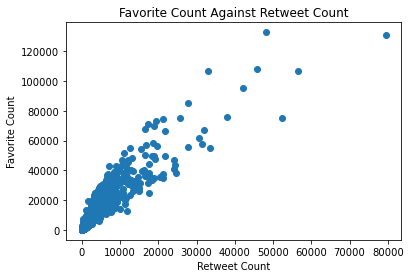

In [78]:
#Visualizing the correlation between retweet_count and favorite_count
plt.scatter(twitter_archive_master['retweet_count'], twitter_archive_master['favorite_count'])
plt.title('Favorite Count Against Retweet Count')
plt.ylabel("Favorite Count")
plt.xlabel('Retweet Count');

#### Conclusion
The favorite count and retweet count have a positive corellation